# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [216]:
#Your code here
import numpy as np
import pandas as pd
from statsmodels.stats.power import TTestIndPower, TTestPower
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import flatiron_stats as fts
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
sns.set_style("whitegrid")



In [203]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv')
df.sample(5)
df.columns
edu_salary = df[['FormalEducation', 'AdjustedCompensation']]
edu_salary

/Users/daihongchen/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, co

,FormalEducation,AdjustedCompensation
0,Bachelor's degree,NaN
1,Master's degree,NaN
2,Master's degree,NaN
3,Master's degree,250000.0
4,Doctoral degree,NaN
...,...,...
26389,Master's degree,NaN
26390,Bachelor's degree,NaN
26391,NaN,NaN
26392,I prefer not to answer,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [204]:
#Your code here

"""
Null hypothesis: the mean of salaries of those with Master's degrees is the same as the mean of salaries of those with Bachelor's degrees. 
"""

salary_master = edu_salary[edu_salary['FormalEducation']== "Master's degree"].dropna()
salary_bachelor = edu_salary[edu_salary['FormalEducation']=="Bachelor's degree"].dropna()


salary_b_fix = salary_bachelor[(salary_bachelor['AdjustedCompensation'] <= 1000000.00) & (salary_bachelor['AdjustedCompensation'] > 0)]
salary_m_fix = salary_master[(salary_master['AdjustedCompensation'] <= 1000000.00) & (salary_master['AdjustedCompensation'] > 0)]

print(f"The df is: {fts.welch_df(salary_m_fix['AdjustedCompensation'], salary_b_fix['AdjustedCompensation']).round(3)}")
print(f"The t  is: {fts.welch_t(salary_m_fix['AdjustedCompensation'], salary_b_fix['AdjustedCompensation']).round(3)}")
print(f"The p value is: {fts.p_value_welch_ttest(salary_m_fix['AdjustedCompensation'], salary_b_fix['AdjustedCompensation'], two_sided = True).round(3)}")

t, p = stats.ttest_ind(salary_m_fix['AdjustedCompensation'], salary_b_fix['AdjustedCompensation'], equal_var = False, nan_policy = 'omit')
print(f"the t is {t.round(3)}, and the p is {p.round(3)}")
# print(salary_master['AdjustedCompensation'])
# len(salary_bachelor)

print("Because the p value is smaller than 0.05, we have the evindences to reject the null hypothesis that the mean of salaries of those who have master's\
degree is the same as the mean of salaries of those who have bachelor's degree")



The df is: 2002.76
The t  is: 3.62
The p value is: 0.0
the t is 3.62, and the p is 0.0
Because the p value is greater than 0.05, we have the evindences to reject the null hypothesis that the mean of salaries of those who have master'sdegree is the same as the mean of salaries of those who have bachelor's degree


## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

count    9.670000e+02
mean     2.956618e+07
std      9.099981e+08
min     -7.351631e+01
25%      4.000000e+04
50%      7.413192e+04
75%      1.200000e+05
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64
(array([114.,  93.,  71.,  65.,  54.,  43.,  40.,  39.,  43.,  39.,  41.,
        35.,  30.,  41.,  25.,  20.,  28.,  16.,  32.,  21.,   9.,  10.,
        10.,  14.,  10.,   2.,   3.,   1.,   0.,   9.,   3.,   2.,   3.,
        13.,   0.,   0.,   3.,   1.,   1.,   0.,   1.,   2.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.]), array([  2000.,   7960.,  13920.,  19880.,  25840.,  31800.,  37760.,
        43720.,  49680.,  55640.,  61600.,  67560.,  73520.,  79480.,
        85440.,  91400.,  97360., 103320., 109280., 115240., 121200.,
       127160., 133120., 139080., 145040., 151000., 156960., 162920.,
       168880., 174840., 180800., 186760., 192720., 198680., 204640.,
       210600., 216560., 222520., 228480., 234440., 240400., 246360.,
       252320., 258280.

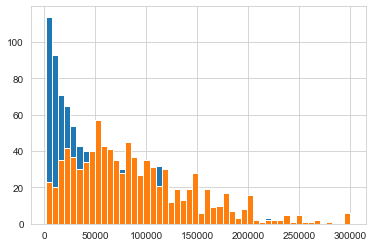

In [205]:
#Your code here
salary_doctor = edu_salary[edu_salary['FormalEducation'] == "Doctoral degree"].dropna()
salary_bachelor = edu_salary[edu_salary['FormalEducation']=="Bachelor's degree"].dropna()

print (salary_doctor['AdjustedCompensation'].describe())
# plt.hist(salary_bachelor['AdjustedCompensation'].astype('int'), bins = 5)
# sns.distplot(salary_bachelor[salary_bachelor['AdjustedCompensation'] <= 120000.0])
# plt.hist(salary_doctor['AdjustedCompensation'])
# plt.hist(salary_doctor['AdjustedCompensation'], bins = 5)
# plt.hist(salary_bachelor['AdjustedCompensation'], bins =5)

salary_b_fix = salary_bachelor[(salary_bachelor['AdjustedCompensation'] <= 1000000.00) & (salary_bachelor['AdjustedCompensation'] > 0)]
salary_d_fix = salary_doctor[(salary_doctor['AdjustedCompensation'] <= 1000000.00) & (salary_doctor['AdjustedCompensation'] > 0)]
print(plt.hist(salary_b_fix['AdjustedCompensation'], range=[2000, 300000], bins=50))
print(plt.hist(salary_d_fix['AdjustedCompensation'], range=[2000, 300000], bins=50))
# 
t, p = stats.ttest_ind(salary_b_fix['AdjustedCompensation'], salary_d_fix['AdjustedCompensation'], equal_var = False, nan_policy = 'omit')

In [208]:
print(f"the t is {t.round(3)}, and the p is {p.round(3)}")

print("Because the p value is smaller than 0.05, we have the evindences to reject the null hypothesis that the mean of salaries of those who have doctor's\
degree is the same as the mean of salaries of those who have bachelor's degree")

the t is -10.0, and the p is 0.0
Because the p value is smaller than 0.05, we have the evindences to reject the null hypothesis that the mean of salaries of those who have master'sdegree is the same as the mean of salaries of those who have bachelor's degree


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [210]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [215]:
#Your code here

edu_salary_1 = edu_salary.dropna()
edu_salary_1 = edu_salary_1[(edu_salary_1['AdjustedCompensation'] < 1000000) & (edu_salary_1['AdjustedCompensation'] > 0)]
formula = "edu_salary_1['AdjustedCompensation'] ~ edu_salary_1['FormalEducation']"
lm = ols(formula, edu_salary_1).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

print("Because the p value is smaller than 0.05, we have the evindences to reject the null hypothesis that the mean of salaries of those three groups with different\
 levels of formal education")

                                       sum_sq      df          F        PR(>F)
edu_salary_1['FormalEducation']  5.548565e+11     6.0  26.127919  1.082559e-30
Residual                         1.515907e+13  4283.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!